In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
from tqdm import tqdm
import random
import pickle

In [2]:
pickle_in = open("./resources/data/face_mask/X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("./resources/data/face_mask/y_train.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("./resources/data/face_mask/X_valid.pickle","rb")
X_valid = pickle.load(pickle_in)

pickle_in = open("./resources/data/face_mask/y_valid.pickle","rb")
y_valid = pickle.load(pickle_in)

pickle_in = open("./resources/data/face_mask/X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("./resources/data/face_mask/y_test.pickle","rb")
y_test = pickle.load(pickle_in)

print(f"X_train= {X_train.shape} y_train= {y_train.shape}")
print(f"X_valid= {X_valid.shape} y_valid= {y_valid.shape}")
print(f"X_test= {X_test.shape} y_test= {y_test.shape}")

X_train= (600, 227, 227, 3) y_train= (600, 1)
X_valid= (306, 227, 227, 3) y_valid= (306, 1)
X_test= (100, 227, 227, 3) y_test= (100, 1)


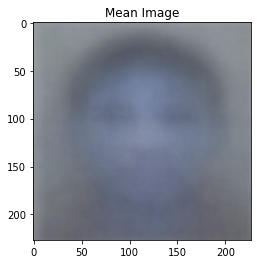

In [3]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))
plt.title('Mean Image')
plt.show()

In [4]:
X_train_norm, X_valid_norm, X_test_norm = X_train-mean_img, X_valid-mean_img, X_test-mean_img

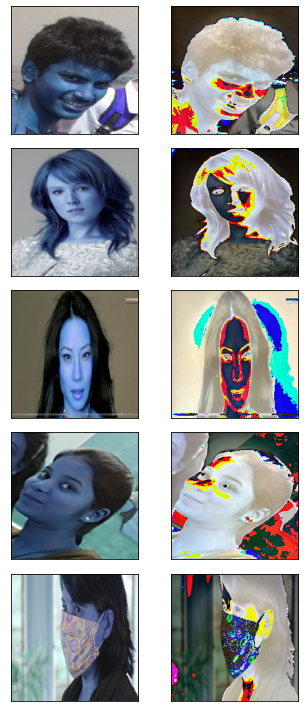

In [5]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [8]:
print(X_train.shape[1:])

(227, 227, 3)


In [32]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train.shape[1:]),
    
    
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(2),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_116 (Activation)  (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_102 (Bat (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_117 (Activation)  (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 8, 8, 256)       

In [34]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [35]:
h = model.fit(x=X_train_norm, y=y_train, epochs=100, validation_data=(X_valid_norm, y_valid), batch_size=32)

Epoch 1/100
19/19 [==============================] - 20s 1s/step - loss: 1.6072 - accuracy: 0.7567 - val_loss: 749.9556 - val_accuracy: 0.5000
Epoch 2/100
19/19 [==============================] - 18s 971ms/step - loss: 0.8130 - accuracy: 0.8183 - val_loss: 152.7064 - val_accuracy: 0.5000
Epoch 3/100
19/19 [==============================] - 20s 1s/step - loss: 0.4467 - accuracy: 0.8717 - val_loss: 31.5535 - val_accuracy: 0.5065
Epoch 4/100
19/19 [==============================] - 19s 1s/step - loss: 0.3437 - accuracy: 0.8867 - val_loss: 6.7840 - val_accuracy: 0.6046
Epoch 5/100
19/19 [==============================] - 23s 1s/step - loss: 0.4224 - accuracy: 0.8700 - val_loss: 2.9518 - val_accuracy: 0.6438
Epoch 6/100
19/19 [==============================] - 21s 1s/step - loss: 0.3000 - accuracy: 0.8983 - val_loss: 3.8287 - val_accuracy: 0.6667
Epoch 7/100
19/19 [==============================] - 24s 1s/step - loss: 0.2602 - accuracy: 0.9067 - val_loss: 6.8760 - val_accuracy: 0.6961
Epoch

19/19 [==============================] - 19s 988ms/step - loss: 0.0921 - accuracy: 0.9750 - val_loss: 0.5151 - val_accuracy: 0.8529
Epoch 59/100
19/19 [==============================] - 19s 992ms/step - loss: 0.0560 - accuracy: 0.9800 - val_loss: 0.9766 - val_accuracy: 0.7876
Epoch 60/100
19/19 [==============================] - 19s 997ms/step - loss: 0.0287 - accuracy: 0.9883 - val_loss: 0.9230 - val_accuracy: 0.8170
Epoch 61/100
19/19 [==============================] - 19s 988ms/step - loss: 0.0198 - accuracy: 0.9950 - val_loss: 0.8238 - val_accuracy: 0.8105
Epoch 62/100
19/19 [==============================] - 19s 991ms/step - loss: 0.0448 - accuracy: 0.9883 - val_loss: 1.1154 - val_accuracy: 0.8464
Epoch 63/100
19/19 [==============================] - 19s 995ms/step - loss: 0.0361 - accuracy: 0.9867 - val_loss: 0.8169 - val_accuracy: 0.8562
Epoch 64/100
19/19 [==============================] - 19s 1s/step - loss: 0.0326 - accuracy: 0.9917 - val_loss: 0.7719 - val_accuracy: 0.8758
E

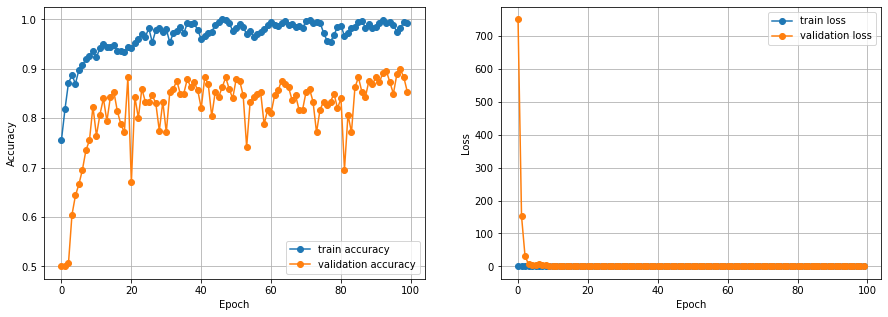

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [72]:
x = np.expand_dims(X_test[0],axis=0)
y_pred = model.predict(x)

In [73]:
y_pred

array([[1.2972608e-13, 1.0000000e+00]], dtype=float32)

In [61]:
prediction = []
for i in range(100):
    prediction.append(np.argmax(y_pred[i]))
prediction = np.array(prediction)

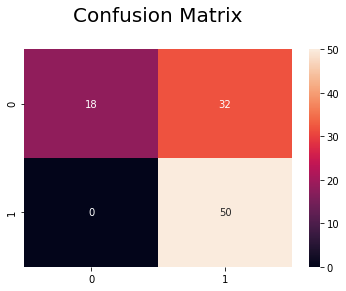

In [65]:
from sklearn import metrics
import seaborn as sns

confusionMatrix  = metrics.confusion_matrix(y_test,prediction)
sns.heatmap(confusionMatrix,annot=True)
plt.title('Confusion Matrix\n', fontsize = 20)
plt.show()

In [66]:
if os.path.isfile('model/face_mask_detection_model.h5') is False:
    model.save('model/face_mask_detection_model.h5')